## Observations and Insights 

During the clinical trials for tumor reducing medications, the following observations have been made for treatment regimens:

1. 249 mice were observed with a nearly 50/50 distribution between male and female.  These mice were provided different drug regimens in the aim of finding treatments which reduced tumor growth within the mice.  

2. Two drug regimens in particular showed promise, Capomulin and Ramicane.  They showed the lowest median tumor volume after treatment as well as the lowest variances.  This could indicate more consistent results from treatments and are worth further investigation.

3. A single mouse (mouse b128) treated with Capomulin was selected to measure the results during treatment.  During the course of 45 days a decrease in tumor volume from 45.00 mm3 to 38.98 mm3 was recorded. This downward trajectory indicates some potential success from the treatment. 

4. A regression analysis of all Capomulin treatments showed a correlation coefficient of 0.87.  This indicates a probable liklihood that tumor volume and weight relate to one another.

As testing continues, results of studies can narrow down the treatment regimens being considered and funded for research trials.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import functools
from functools import reduce
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_studies = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
comb_studies

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(pd.unique(comb_studies['Mouse ID']))


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID
duplicate_mice = comb_studies[comb_studies.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = comb_studies.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_study['Mouse ID'].count()

1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

dr_mean = clean_study[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
dr_mean.reset_index()
dr_median = clean_study[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
dr_median.reset_index()
dr_variance = clean_study[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
dr_variance.reset_index()
dr_deviation = clean_study[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
dr_deviation.reset_index()
dr_sem = clean_study[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
dr_sem.reset_index()
comb_dr = [dr_mean, dr_median, dr_variance, dr_deviation, dr_sem]

# Assemble the resulting series into a single summary dataframe.
comb_dr_stats = reduce(lambda left,right: pd.merge(left,right,on='Drug Regimen'),comb_dr)
comb_dr_stats.columns = ['Tumor Volume (Mean)','Tumor Volume (Median)','Tumor Volume (Variance)','Tumor Volume (Std. Deviation)','Tumor Volume (SEM)']
comb_dr_stats


,Tumor Volume (Mean),Tumor Volume (Median),Tumor Volume (Variance),Tumor Volume (Std. Deviation),Tumor Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
dr_agg_stats = clean_study[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").aggregate(['mean','median','var','std','sem'])
dr_agg_stats.columns = ['Tumor Volume (Mean)','Tumor Volume (Median)','Tumor Volume (Variance)','Tumor Volume (Std. Deviation)','Tumor Volume (SEM)']
dr_agg_stats = dr_agg_stats.reset_index()
dr_agg_stats

,Drug Regimen,Tumor Volume (Mean),Tumor Volume (Median),Tumor Volume (Variance),Tumor Volume (Std. Deviation),Tumor Volume (SEM)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

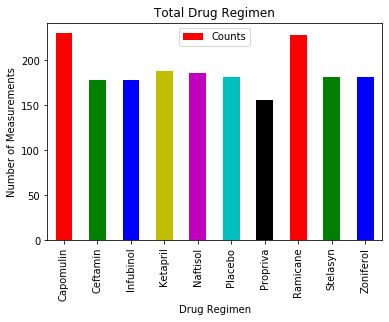

In [8]:
# Get x axis values for Drug Regimen Counts
x_axis = list(comb_dr_stats.index.values)

# Get y axis
y_axis = clean_study.groupby(['Drug Regimen']).count()
y_axis = y_axis[['Tumor Volume (mm3)']]
y_axis.columns = ['Counts']

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
panda_bar = y_axis.plot(kind='bar', title='Total Drug Regimen',color='rgbymck')
panda_bar.set_ylabel('Number of Measurements')
panda_bar


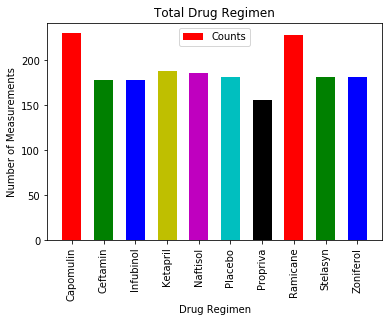

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x_axis, y_axis['Counts'],width=.6,color='rgbymck')
plt.title('Total Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.legend(['Counts'],loc='upper center')
plt.xticks(rotation = 90)
plt.show()



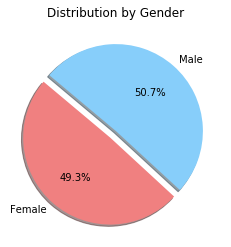

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_study.groupby(['Sex'])['Mouse ID'].count().reset_index()
explode = (0.1, 0)
labels = ['Female','Male']
colors = ['lightcoral','lightskyblue']
gender.columns = ['Sex','']
plot = gender.plot.pie(y='',explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140,title='Distribution by Gender',legend=False)

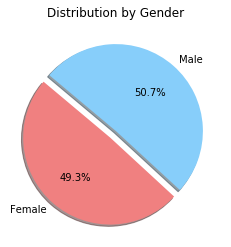

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice = clean_study.groupby('Sex')['Mouse ID'].count()
plt.title('Distribution by Gender')
plt.pie(gender_mice,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
list_trials = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
four_trials = clean_study[clean_study['Drug Regimen'].isin(list_trials)]
mice_max = pd.DataFrame(four_trials.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_trials = pd.merge(mice_max, four_trials, on=('Mouse ID','Timepoint'), how='left')
merged_trials

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [20]:
# Put treatments into a list 
capomulin_data = merged_trials.loc[merged_trials['Drug Regimen']=='Capomulin']
ramicane_data = merged_trials.loc[merged_trials['Drug Regimen']=='Ramicane']
ceftamin_data = merged_trials.loc[merged_trials['Drug Regimen']=='Ceftamin']
infubinol_data = merged_trials.loc[merged_trials['Drug Regimen']=='Infubinol']


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_trials['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'The lower quartile of all tumor volumes is: {lowerq}')
print(f'The upper quartile of all tumor volumes is: {upperq}')
print(f'The interquartile range of all tumor volumes is: {iqr}')
print(f'The median quartile of all tumor volumes is: {lowerq}')

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')
    

The lower quartile of all tumor volumes is: 37.187743802499995
The upper quartile of all tumor volumes is: 59.930261755000004
The interquartile range of all tumor volumes is: 22.74251795250001
The median quartile of all tumor volumes is: 37.187743802499995
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


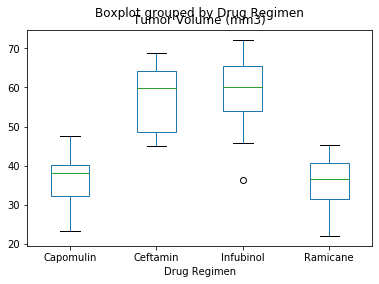

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
merged_trials.boxplot(by='Drug Regimen', column = ['Tumor Volume (mm3)'], grid=False)


## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Filter using loc to get single mouse data
line_cap = clean_study.loc[clean_study['Mouse ID']=='b128']
line_cap.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


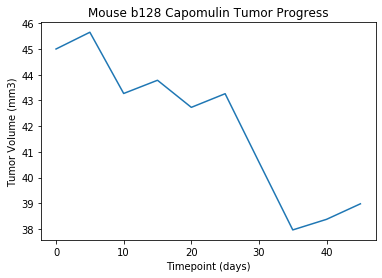

In [16]:
#capomulin_data['Tumor Volume (mm3)'].plot.line()
mouse_b128 = line_cap[['Timepoint', 'Tumor Volume (mm3)']]
mouse_b128.set_index('Timepoint')['Tumor Volume (mm3)'].plot()
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse b128 Capomulin Tumor Progress')
plt.show()

In [17]:
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


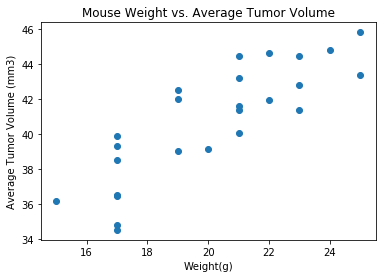

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_metrics = clean_study.loc[clean_study['Drug Regimen']=='Capomulin',['Timepoint','Tumor Volume (mm3)','Mouse ID','Weight (g)']].groupby('Mouse ID')
y_axis = avg_metrics['Tumor Volume (mm3)'].mean()
x_axis = avg_metrics['Weight (g)'].first()

plt.scatter(x_axis,y_axis)
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

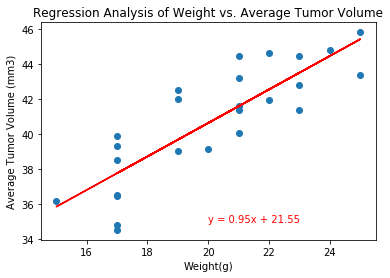

The correlation coefficient between mouse weight and average tumor volume is 0.8419363424694718
slope = 0.9544396890241045
intercept = 21.552160532685015
r value = 0.8419363424694718
pvalue = 1.3225722434712642e-07
standard error = 0.1275435903320134
The equation of the line is y = 0.95x + 21.55


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
plt.annotate(line_eq,xy=(20,35),color='red')
plt.title('Regression Analysis of Weight vs. Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f'The correlation coefficient between mouse weight and average tumor volume is {rvalue}')
print(f'slope = {slope}')
print(f'intercept = {intercept}')
print(f'r value = {rvalue}')
print(f'pvalue = {pvalue}')
print(f'standard error = {stderr}')
print(f'The equation of the line is {line_eq}')